In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import os
import random
import math 

In [2]:
data=[]
files=os.listdir("raw-img/128/selectedcane")
for i in files:
    data.append([cv2.cvtColor(cv2.imread("raw-img/128/selectedcane/"+i),cv2.COLOR_BGR2GRAY),[1,0,0]])

In [3]:

files=os.listdir("raw-img/128/selectedele")
for i in files:
    data.append([cv2.cvtColor(cv2.imread("raw-img/128/selectedele/"+i),cv2.COLOR_BGR2GRAY),[0,1,0]])


In [4]:

files=os.listdir("raw-img/128/selectedhorse")
for i in files:
    data.append([cv2.cvtColor(cv2.imread("raw-img/128/selectedhorse/"+i),cv2.COLOR_BGR2GRAY),[0,0,1]])

In [5]:
for i in range(10):
    random.shuffle(data)

In [6]:
data

[[array([[255, 255, 255, ..., 255,   0,   1],
         [255, 255, 255, ...,   0,   2,   0],
         [255, 255, 255, ...,   0,   0,   2],
         ...,
         [255, 253, 255, ..., 255, 252, 254],
         [254,   3, 252, ..., 254, 255, 255],
         [255, 255, 255, ..., 255, 255, 254]], dtype=uint8), [1, 0, 0]],
 [array([[  0, 255,   0, ..., 255, 255, 255],
         [  5,   0,   1, ..., 255, 255, 255],
         [252, 255, 253, ..., 255, 255, 255],
         ...,
         [255, 252, 253, ..., 255, 255, 255],
         [255, 255, 255, ...,   0,   4, 253],
         [254, 254, 255, ..., 255, 255, 254]], dtype=uint8), [1, 0, 0]],
 [array([[255, 255, 254, ..., 255, 254, 255],
         [252, 253,   2, ..., 254, 255, 254],
         [  2,   0,   0, ..., 255, 251, 255],
         ...,
         [254, 255,   0, ...,   2, 254, 255],
         [255,   3,   0, ...,   0,   2,   0],
         [255, 253, 255, ...,   0,   0,   1]], dtype=uint8), [0, 0, 1]],
 [array([[255, 255, 255, ..., 255, 255, 255],
   

In [7]:
x=[]
y=[]
for i in range(len(data)):
    x.append(np.reshape(data[i][0],(128*128)))
    y.append(data[i][1])
    
y=np.array(y)
x=np.array(x)

In [8]:
arch={'layer1':len(x[0]),'layer2':100,'layer3':3}

In [9]:
np.random.seed(0)
v=np.random.uniform(low=0.000001, high=0.00009, size=(arch['layer1'],arch['layer2']))

np.random.seed(0)
w=np.random.uniform(low=0.0001, high=0.009, size=(arch['layer2'],arch['layer3']))


In [10]:
def sigmoid(x):
    temp=[]
    for i in range(len(x)):
        t=0.0
        t=1/(1+math.exp(-x[i]))
        temp.append(t)
        t=np.array(temp)
    return(np.reshape(t,(1,len(t))))
def diffSigmoid(x):
    t=sigmoid(x)
    return(t*(1-t))

def predict(x):
    Zin_temp=np.matmul(x,v)
    Zout_temp=sigmoid(Zin_temp)
        
    Yin_temp=np.matmul(Zout_temp,w)
    Yout_temp=sigmoid(Yin_temp.T)
    return(Yout_temp)

In [11]:
x=np.divide(x,255)

In [12]:
epoch=25
alpha=0.01
errorFreq=[]
for e in range(epoch):
    error=0
    for i in range(len(x)):
        #feed forward
        
        Zin=np.matmul(x[i],v)
        Zout=sigmoid(Zin)
        
        Yin=np.matmul(Zout,w)
        Yout=sigmoid(Yin.T)
        
       
        
        #calculate error
        
        derivative=diffSigmoid(Yin.T)
        delta0=np.multiply(y[i]-Yout,derivative)
        
       
        
        delta1=np.matmul(w,delta0.T)
        
        derivative=diffSigmoid(Zin.T)
        delat1=np.multiply(delta1,derivative)
        
        #update weights
        
        v=v+alpha*np.matmul(np.reshape(x[i],(x[i].shape[0],1)),delta1.T)
        w=w+alpha*np.matmul(Zout.T,delta0)
        
        predictedResult=predict(x[i])
        predictedResult=np.array(np.round(predictedResult[0]),dtype=int)
        
        if(not(np.array_equal(predictedResult,y[i]))):
            error+=1
            
    errorFreq.append(error)
    accuracy=(len(x)-error)/float(len(x))*100.0
    print("epoche "+str(e+1)+" accuracy ",accuracy)
        
        

('epoche 1 accuracy ', 4.123711340206185)
('epoche 2 accuracy ', 0.0)
('epoche 3 accuracy ', 0.0)
('epoche 4 accuracy ', 0.0)
('epoche 5 accuracy ', 0.0)
('epoche 6 accuracy ', 0.0)
('epoche 7 accuracy ', 0.0)
('epoche 8 accuracy ', 0.0)
('epoche 9 accuracy ', 0.0)
('epoche 10 accuracy ', 0.0)
('epoche 11 accuracy ', 4.123711340206185)
('epoche 12 accuracy ', 29.896907216494846)
('epoche 13 accuracy ', 72.16494845360825)
('epoche 14 accuracy ', 95.87628865979381)
('epoche 15 accuracy ', 96.90721649484536)
('epoche 16 accuracy ', 98.96907216494846)
('epoche 17 accuracy ', 98.96907216494846)
('epoche 18 accuracy ', 100.0)
('epoche 19 accuracy ', 100.0)
('epoche 20 accuracy ', 100.0)
('epoche 21 accuracy ', 100.0)
('epoche 22 accuracy ', 100.0)
('epoche 23 accuracy ', 100.0)
('epoche 24 accuracy ', 100.0)
('epoche 25 accuracy ', 100.0)


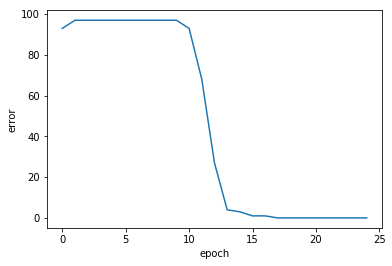

In [14]:
plt.plot(errorFreq)
plt.xlabel("epoch")
plt.ylabel("error")
plt.show()